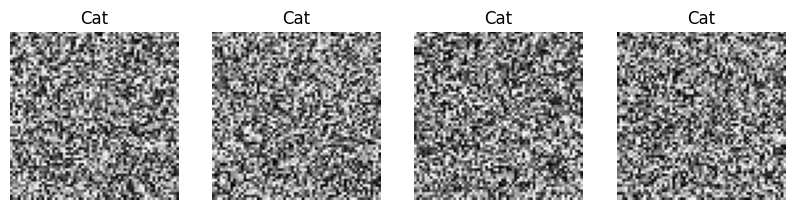

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Parameters
num_samples = 1000  # Number of images per class
img_size = (64, 64)  # Image resolution

# Generate synthetic images for "cats" (label 0) and "dogs" (label 1)
cat_images = np.random.randint(0, 256, (num_samples, img_size[0], img_size[1]), dtype=np.uint8)
dog_images = np.random.randint(0, 256, (num_samples, img_size[0], img_size[1]), dtype=np.uint8)

# Flatten images
cat_images_flat = cat_images.reshape(num_samples, -1)
dog_images_flat = dog_images.reshape(num_samples, -1)

# Stack data and labels
images = np.vstack((cat_images_flat, dog_images_flat))
labels = np.array([0] * num_samples + [1] * num_samples)  # 0 for cats, 1 for dogs

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Visualize a few synthetic images
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cat_images[i], cmap='gray')
    plt.title("Cat" if labels[i] == 0 else "Dog")
    plt.axis('off')
plt.show()

In [2]:
# Initialize and train the SVM
model = SVC(kernel="linear")  # You can experiment with "rbf" or other kernels
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Synthetic Model Accuracy: {accuracy * 100:.2f}%")


Synthetic Model Accuracy: 49.50%


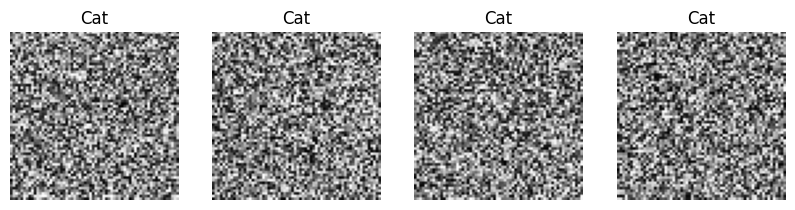

Model Accuracy on Synthetic Data: 49.50%

Classification Report:
              precision    recall  f1-score   support

         Cat       0.49      0.50      0.50       199
         Dog       0.50      0.49      0.49       201

    accuracy                           0.49       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.50      0.49      0.49       400



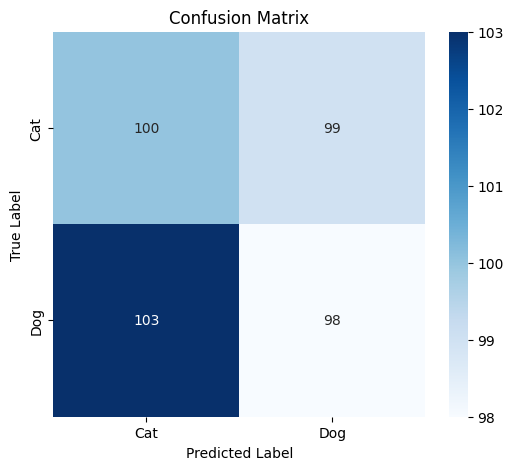

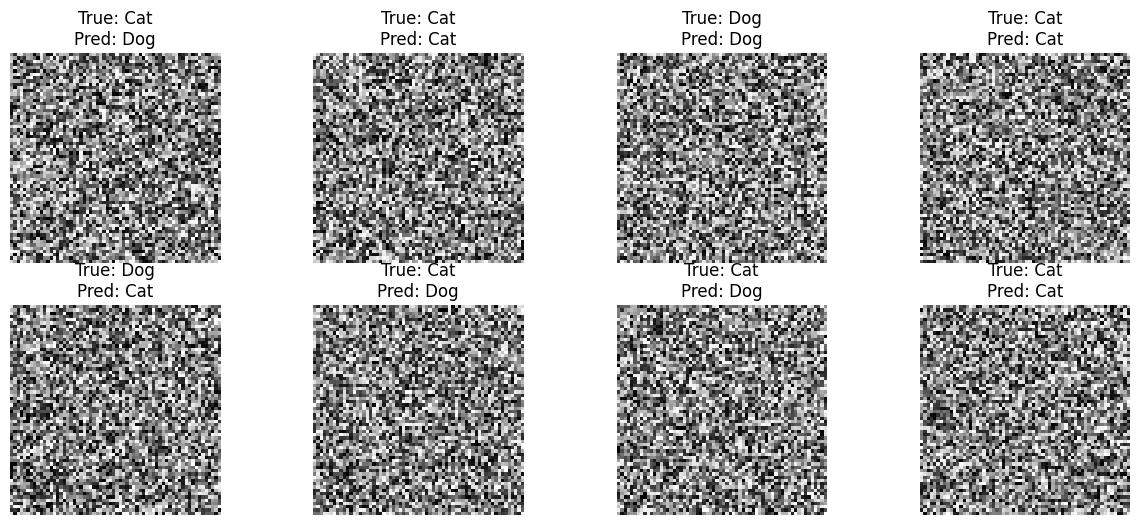

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_samples = 1000  # Number of images per class
img_size = (64, 64)  # Image resolution

# Generate synthetic images for "cats" (label 0) and "dogs" (label 1)
cat_images = np.random.randint(0, 256, (num_samples, img_size[0], img_size[1]), dtype=np.uint8)
dog_images = np.random.randint(0, 256, (num_samples, img_size[0], img_size[1]), dtype=np.uint8)

# Flatten images
cat_images_flat = cat_images.reshape(num_samples, -1)
dog_images_flat = dog_images.reshape(num_samples, -1)

# Stack data and labels
images = np.vstack((cat_images_flat, dog_images_flat))
labels = np.array([0] * num_samples + [1] * num_samples)  # 0 for cats, 1 for dogs

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Visualize a few synthetic images
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(cat_images[i], cmap='gray')
    plt.title("Cat" if labels[i] == 0 else "Dog")
    plt.axis('off')
plt.show()

# Train the SVM model
model = SVC(kernel="linear")  # You can try "rbf" or "poly" for different kernels
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Synthetic Data: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualizing Some Predictions
def plot_predictions(X, y_true, y_pred, num_samples=8):
    plt.figure(figsize=(15, 6))
    indices = np.random.choice(range(len(X)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        img = X[idx].reshape(img_size)
        true_label = "Cat" if y_true[idx] == 0 else "Dog"
        pred_label = "Cat" if y_pred[idx] == 0 else "Dog"
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")
    plt.show()

# Plot a few predictions
plot_predictions(X_test, y_test, y_pred, num_samples=8)
